<a href="https://colab.research.google.com/github/justingardner/tutorials/blob/master/recurrence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [307]:
# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from tqdm import tqdm as progressBar
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from IPython import display
from functools import partial
from numpy.linalg import eig

In [164]:
!pip install -Uqq ipdb
import ipdb

In [161]:
%pdb off

Automatic pdb calling has been turned OFF


100%|██████████| 1999/1999 [00:01<00:00, 1960.25it/s]


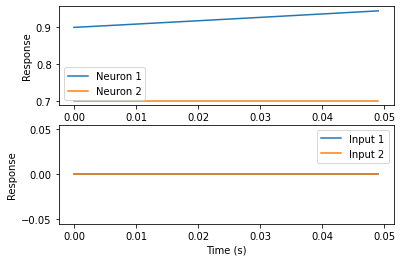

In [342]:
# number of seconds to simulate for
simulationLength = 2;

# Number of time points per second
sampleRate = 1000;

# some constants calculated from the above parameters
dt = 1/sampleRate;
nTimePoints = int(simulationLength * sampleRate);

#initial state - just start at 0,0
x0 = np.matrix([.9, 0.7]).transpose()

# time constant of units in seconds
tau = .005;

# weight matrix, in this case each unit is independent
# ie there are no connections between the units and
# they will just respond as an exponential function with
# time constant tau to the inputs.
W = np.matrix([[-(1/tau), -1/tau],[-1/tau,-(1/tau)]]);

W = np.matrix([[1, 0],[0,0]]);
# u are the inputs. Here we just make them have a short pulse
# of activity and otherwise be 0.
pulseLen = 0.01;
u = np.matrix(np.zeros((2,nTimePoints)));
u[0,int(1*sampleRate):int((1+pulseLen)*sampleRate)] = 1/int(sampleRate*pulseLen)
u[1,int(1*sampleRate):int((1+pulseLen)*sampleRate)] = 1.25/int(sampleRate*pulseLen)

# a time vector, just so that we can plot the traces with real units.
t = np.array(range(0,nTimePoints))/sampleRate;

# initialize array that will hold each state of the model neurons over time
nTimePoints = int(simulationLength*sampleRate)
x = np.matrix(np.zeros((2,nTimePoints)))

# set the initial state of the neurons
x[:,0] = x0;

# ok, here's the big computation. We will use the simplest possible way to
# numerically simulate the equations which is just to compute the derivative
# in small time steps and add it on to the current state and iterate.
# This is known as the "Euler method" and for simple equations performs
# just fine.
for iTimePoint in progressBar(range(1,nTimePoints)):
  # compute the derivative as the weight matrix time the current state.
  # note the the dt is on the right hand side, because we want
  # to know what the dx is that we need to add to our current state x.
  dx = W @ x[:,iTimePoint-1] * dt
  # add the dx to x and also add in the inputs.
  x[:,iTimePoint] = x[:,iTimePoint-1] + dx + u[:,iTimePoint];

# Display our simulation
plt.figure();
# set these to display a particular portion of the trace that you are interested in.
startTime = 0; endTime = 0.05;
# subplot that shows the neuron states
plt.subplot(2,1,1)
plt.plot(t[int(startTime*sampleRate):int(endTime*sampleRate)],x[:,int(startTime*sampleRate):int(endTime*sampleRate)].transpose());
plt.xlabel('Time (s)');
plt.ylabel('Response');
plt.legend(('Neuron 1','Neuron 2'))
# subplot that shows the input states
plt.subplot(2,1,2)
plt.plot(t[int(startTime*sampleRate):int(endTime*sampleRate)],u[:,int(startTime*sampleRate):int(endTime*sampleRate)].transpose());
plt.xlabel('Time (s)');
plt.ylabel('Response');
plt.legend(('Input 1','Input 2'))

100%|██████████| 1999/1999 [00:00<00:00, 13218.71it/s]


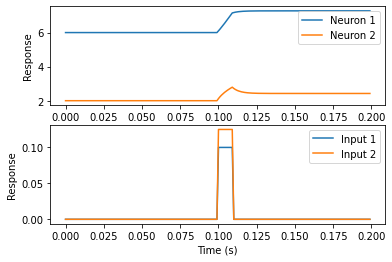

In [455]:
# number of seconds to simulate for
simulationLength = 2;

# Number of time points per second
sampleRate = 1000;

# some constants calculated from the above parameters
dt = 1/sampleRate;
nTimePoints = int(simulationLength * sampleRate);

#initial state - just start at 0,0
x0 = np.matrix([6, 2]).transpose()

# time constant of units in seconds
tau = .005;

# weight matrix, in this case each unit is independent
# ie there are no connections between the units and
# they will just respond as an exponential function with
# time constant tau to the inputs.
#W = (1/tau)*np.matrix([[-1, 1],[1,-1]]);
#T = (1/tau)*np.matrix([[0,1],[1,0]]);

W = (1/tau)*np.matrix([[-1, 0],[0,-1]]);
T = (1/tau)*np.matrix([[0.9, 0.3],[0.3, 0.1]])

W = W+T;

# u are the inputs. Here we just make them have a short pulse
# of activity and otherwise be 0.
pulseLen = 0.01;pulseStart = 0.1;
u = np.matrix(np.zeros((2,nTimePoints)));
u[0,int(pulseStart*sampleRate):int((pulseStart+pulseLen)*sampleRate)] = 1/int(sampleRate*pulseLen)
u[1,int(pulseStart*sampleRate):int((pulseStart+pulseLen)*sampleRate)] = 1.25/int(sampleRate*pulseLen)

# a time vector, just so that we can plot the traces with real units.
t = np.array(range(0,nTimePoints))/sampleRate;

# initialize array that will hold each state of the model neurons over time
nTimePoints = int(simulationLength*sampleRate)
x = np.matrix(np.zeros((2,nTimePoints)))

# set the initial state of the neurons
x[:,0] = x0;

# ok, here's the big computation. We will use the simplest possible way to
# numerically simulate the equations which is just to compute the derivative
# in small time steps and add it on to the current state and iterate.
# This is known as the "Euler method" and for simple equations performs
# just fine.
for iTimePoint in progressBar(range(1,nTimePoints)):
  # compute the derivative as the weight matrix time the current state.
  # note the the dt is on the right hand side, because we want
  # to know what the dx is that we need to add to our current state x.
  dx = W @ x[:,iTimePoint-1] * dt
  # add the dx to x and also add in the inputs.
  x[:,iTimePoint] = x[:,iTimePoint-1] + dx + u[:,iTimePoint];

# Display our simulation
plt.figure();
# set these to display a particular portion of the trace that you are interested in.
startTime = 0; endTime = 0.2;
# subplot that shows the neuron states
plt.subplot(2,1,1)
plt.plot(t[int(startTime*sampleRate):int(endTime*sampleRate)],x[:,int(startTime*sampleRate):int(endTime*sampleRate)].transpose());
plt.xlabel('Time (s)');
plt.ylabel('Response');
plt.legend(('Neuron 1','Neuron 2'))
# subplot that shows the input states
plt.subplot(2,1,2)
plt.plot(t[int(startTime*sampleRate):int(endTime*sampleRate)],u[:,int(startTime*sampleRate):int(endTime*sampleRate)].transpose());
plt.xlabel('Time (s)');
plt.ylabel('Response');
plt.legend(('Input 1','Input 2'))

In [428]:
# display the eigenvalues
##W[0,0] -= 1/tau;
#W[1,1] -= 1/tau;
w,v=eig(T*tau)
print('eigenvalue:', w)

# it's also helpful to plot them as -1/eigenvalue, as this will show you the timeconstants
print('-1/eigenvalue:', -1/w)

print('eigenvector:',v[:,0])

eigenvalue: [1.00000000e+00 1.11022302e-16]
-1/eigenvalue: [-1.00000000e+00 -9.00719925e+15]
eigenvector: [[0.70710678]
 [0.70710678]]


In [452]:
# choose a direction for our eigenvector
# this will be the direction of the line attractor
# i.e. the network will settle to where neuron1 and
# neuron 2 have a ratio of the values here.
lineAttractorDirection = np.matrix([3,1])
# normalize to unit length (so that we get an eigenvalue of 1)
lineAttractorDirection = lineAttractorDirection / np.linalg.norm(lineAttractorDirection);

# remember the eigenvalue / eigenvector decomposition?
# it says that a square nxn matrix of full rank can
# be written as:
# A = QLQ-1
# where Q is a matrix with the columns filled with the eigenvectors
# and L is a diagonal martrix with the eigenvalues along the diagonal.
# If we further impose that A will be a symmetric matrix (which makes
# all the connections symmetric, then Q-1 = Q' i.e. the inverse of
# the eigenvector matrix is it's transpose.
# ok, with that linear algebra, then we can make a matrix that
# has the eigenvector we specified above, with an eigenvalue of 1,
# by just making a column matrix out of the u above by taking
# its transpose and then mulitplying it by the transpose of that
Q = lineAttractorDirection.transpose();
T = Q @ Q.transpose()
# print out the matrix that comes out of that
print('Desired connection matrix T:\n',T)
# Check the eigenvalues and eigenvectors of this matrix
# to the match what we asked for?
w,v=eig(T)
print('eigenvalue:', w)
print('Desired line attractor direction:',lineAttractorDirection)
print('eigenvector:',v.transpose()[0,:])

Desired connection matrix T:
 [[0.9 0.3]
 [0.3 0.1]]
eigenvalue: [1. 0.]
Desired line attractor direction: [[0.9486833  0.31622777]]
eigenvector: [[0.9486833  0.31622777]]


100%|██████████| 19999/19999 [00:00<00:00, 22055.71it/s]


eigenvalue: [ 7.10542736e-15 -1.00000000e+02  7.10542736e-15 -1.00000000e+02]


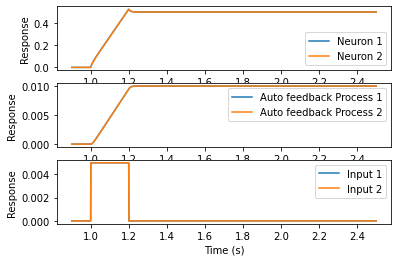

In [264]:
# number of seconds to simulate for
simulationLength = 20;

# Number of time points per second
sampleRate = 1000;

# some constants calculated from the above parameters
dt = 1/sampleRate;
nTimePoints = int(simulationLength * sampleRate);

#initial state - just start with all 0s
x0 = np.matrix([0, 0, 0, 0]).transpose()

# some time constants
# tau is the intrinsic time constant of each neuron
tau = 0.020;
# tauFedback is the time constant of the feedback process
tauFeedback = 0.020;
# gAutoFeedback controls the gain of the feedback on to each neuron
# from itself
gAutoFeedback = 50/tauFeedback;

# weight matrix
W = np.matrix([[-1/tau, 0, gAutoFeedback, 0],
               [0,-1/tau, 0, gAutoFeedback],
               [1,0,-1/tauFeedback, 0],
               [0,1,0,-1/tauFeedback]])

# define inputs, with a longish pulse of input
# note that we start one input a little before
# the other way to insure that there is some 
# asymmetry so that one neuron can win in the
# beginning and start the oscillation going.
u = np.matrix(np.zeros((4,nTimePoints)));
pulseLen = 0.2;
u[0,int(1*sampleRate):int((1+pulseLen)*sampleRate)] = 1/int(sampleRate*pulseLen)
u[1,int(1*sampleRate):int((1+pulseLen)*sampleRate)] = 1/int(sampleRate*pulseLen)

# a time vector, just so that we can plot the traces with real units.
t = np.array(range(0,nTimePoints))/sampleRate;

# initialize array that will hold each state of the model neurons over time
nTimePoints = int(simulationLength*sampleRate)
x = np.matrix(np.zeros((4,nTimePoints)))

# compute model using Euler's method
for iTimePoint in progressBar(range(1,nTimePoints)):
  dx = W @ x[:,iTimePoint-1] * dt
  x[:,iTimePoint] = x[:,iTimePoint-1] + dx + u[:,iTimePoint];

# Display figure
plt.figure();
startTime = 0.9; endTime = 2.5;
plt.subplot(3,1,1)
plt.plot(t[int(startTime*sampleRate):int(endTime*sampleRate)],x[0:2,int(startTime*sampleRate):int(endTime*sampleRate)].transpose());
plt.xlabel('Time (s)');
plt.ylabel('Response');
plt.legend(('Neuron 1','Neuron 2'))
plt.subplot(3,1,2)
plt.plot(t[int(startTime*sampleRate):int(endTime*sampleRate)],x[2:4,int(startTime*sampleRate):int(endTime*sampleRate)].transpose());
plt.xlabel('Time (s)');
plt.ylabel('Response');
plt.legend(('Auto feedback Process 1','Auto feedback Process 2'))
plt.subplot(3,1,3)
plt.plot(t[int(startTime*sampleRate):int(endTime*sampleRate)],u[0:2,int(startTime*sampleRate):int(endTime*sampleRate)].transpose());
plt.xlabel('Time (s)');
plt.ylabel('Response');
plt.legend(('Input 1','Input 2'))

# display eigenvalues
w,v=eig(W);
print('eigenvalue:', w);



100%|██████████| 19999/19999 [00:00<00:00, 20370.98it/s]


eigenvalue: [ -2.6+70.31528994j  -2.6-70.31528994j -47.6+51.99269179j
 -47.6-51.99269179j]


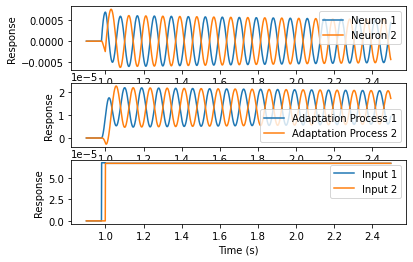

In [180]:
# number of seconds to simulate for
simulationLength = 20;

# Number of time points per second
sampleRate = 1000;

# some constants calculated from the above parameters
dt = 1/sampleRate;
nTimePoints = int(simulationLength * sampleRate);

#initial state - just start with all 0s
x0 = np.matrix([0, 0, 0, 0]).transpose()

# some time constants
# tau is the intrinsic time constant of each neuron
tau = 0.020;
# tauAdapt is the time constant of the adaptation process
tauAdapt = 5;
# gInputToAdapt controls the input to the adaptation process
# from the neuron
gInputToAdapt = 1;
# gInhibit controls the gain of the inhibition from the 
# other neuron
gInhibit = 45;
# gAdapt controls the gain of the adaptation process on
# to the neuron
gAdapt = gInhibit*110;
W = np.matrix([[-1/tau, -gInhibit, -gAdapt, 0],[-gInhibit,-1/tau, 0, -gAdapt],[gInputToAdapt,0,-1/tauAdapt, 0],[0,gInputToAdapt,0,-1/tauAdapt]])

# define inputs, with a longish pulse of input
# note that we start one input a little before
# the other way to insure that there is some 
# asymmetry so that one neuron can win in the
# beginning and start the oscillation going.
u = np.matrix(np.zeros((4,nTimePoints)));
pulseLen = 15;
u[0,int(1*sampleRate):int((1+pulseLen)*sampleRate)] = 1/int(sampleRate*pulseLen)
u[1,int(1*sampleRate):int((1+pulseLen)*sampleRate)] = 1/int(sampleRate*pulseLen)
u[0,int(0.98*sampleRate):int((1)*sampleRate)] = 1.01/int(sampleRate*pulseLen)

# a time vector, just so that we can plot the traces with real units.
t = np.array(range(0,nTimePoints))/sampleRate;

# initialize array that will hold each state of the model neurons over time
nTimePoints = int(simulationLength*sampleRate)
x = np.matrix(np.zeros((4,nTimePoints)))

# compute model using Euler's method
for iTimePoint in progressBar(range(1,nTimePoints)):
  dx = W @ x[:,iTimePoint-1] * dt
  x[:,iTimePoint] = x[:,iTimePoint-1] + dx + u[:,iTimePoint];

# Display figure
plt.figure();
startTime = 0.9; endTime = 2.5;
plt.subplot(3,1,1)
plt.plot(t[int(startTime*sampleRate):int(endTime*sampleRate)],x[0:2,int(startTime*sampleRate):int(endTime*sampleRate)].transpose());
plt.xlabel('Time (s)');
plt.ylabel('Response');
plt.legend(('Neuron 1','Neuron 2'))
plt.subplot(3,1,2)
plt.plot(t[int(startTime*sampleRate):int(endTime*sampleRate)],x[2:4,int(startTime*sampleRate):int(endTime*sampleRate)].transpose());
plt.xlabel('Time (s)');
plt.ylabel('Response');
plt.legend(('Adaptation Process 1','Adaptation Process 2'))
plt.subplot(3,1,3)
plt.plot(t[int(startTime*sampleRate):int(endTime*sampleRate)],u[0:2,int(startTime*sampleRate):int(endTime*sampleRate)].transpose());
plt.xlabel('Time (s)');
plt.ylabel('Response');
plt.legend(('Input 1','Input 2'))

# display eigenvalues
w,v=eig(W);
print('eigenvalue:', w);



100%|██████████| 19999/19999 [00:01<00:00, 17692.97it/s]


eigenvalue: [-90.90909091  -1.11111111 -50.          -1.11111111 -90.90909091
 -50.        ]


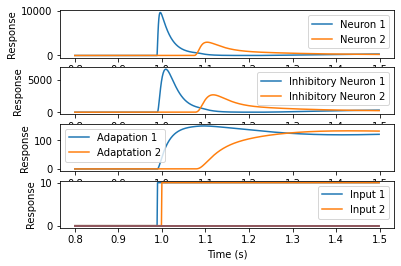

In [203]:
# number of seconds to simulate for
simulationLength = 20;

# Number of time points per second
sampleRate = 1000;

# some constants calculated from the above parameters
dt = 1/sampleRate;
nTimePoints = int(simulationLength * sampleRate);

# initial state
x0 = np.matrix([0, 0, 0, 0, 0, 0]).transpose()

# model parameters
tau = 0.020;
tauI = 0.011;
tauH = 0.9;
h = 0.47;
#h = 0;
g = 0.01;
# weight matrix
W = np.matrix([[-1/tau,0,0,0,0,0],[0,-1/tau,0,0,0,0],[1/tauI,0,-1/tauI,0,0,0],[0,1/tauI,0,-1/tauI,0,0],[h/tauH,0,0,0,-1/tauH,0],[0,h/tauH,0,0,0,-1/tauH]])

# define inputs
u = np.matrix(np.zeros((6,nTimePoints)));
pulseLen = 15;
u[0,int(1*sampleRate):int((1+pulseLen)*sampleRate)] = 10;
u[1,int(1*sampleRate):int((1+pulseLen)*sampleRate)] = 10;
u[0,int(0.99*sampleRate):int((1)*sampleRate)] = 10;
t = np.array(range(0,nTimePoints))/sampleRate;

# initialize array that will hold each state of the model
nTimePoints = int(simulationLength*sampleRate)
x = np.matrix(np.zeros((6,nTimePoints)))
x[:,0] = x0;

for iTimePoint in progressBar(range(1,nTimePoints)):
  # update linear part
  dx = W @ x[:,iTimePoint-1] * dt
  x[:,iTimePoint] = x[:,iTimePoint-1] + dx;
  # update non-linear part, first get input
  # as difference between input and inhibition
  leftInput = u[0,iTimePoint] - g*x[3,iTimePoint-1]
  rightInput = u[1,iTimePoint] - g*x[2,iTimePoint-1]
  # threshold and square
  leftInput = np.multiply((leftInput>0),leftInput)**2
  rightInput = np.multiply((rightInput>0),rightInput)**2
  # now calculate naka-rushton
  leftNakaRushton = 100*leftInput / ((10 + x[4,iTimePoint-1])**2 + leftInput);
  rightNakaRushton = 100*rightInput / ((10 + x[5,iTimePoint-1])**2 + rightInput);
  # and add to Ev / Eh
  x[0,iTimePoint] += leftNakaRushton/tau;
  x[1,iTimePoint] += rightNakaRushton/tau;

# dress up figure
plt.figure();
startTime = 0.8; endTime = 1.5;
plt.subplot(4,1,1)
plt.plot(t[int(startTime*sampleRate):int(endTime*sampleRate)],x[0:2,int(startTime*sampleRate):int(endTime*sampleRate)].transpose());
#plt.plot(t[int(startTime*sampleRate):int(endTime*sampleRate)],u[:,int(startTime*sampleRate):int(endTime*sampleRate)].transpose());
plt.xlabel('Time (s)');
plt.ylabel('Response');
plt.legend(('Neuron 1','Neuron 2'))
plt.subplot(4,1,2)
plt.plot(t[int(startTime*sampleRate):int(endTime*sampleRate)],x[2:4,int(startTime*sampleRate):int(endTime*sampleRate)].transpose());
#plt.plot(t[int(startTime*sampleRate):int(endTime*sampleRate)],u[:,int(startTime*sampleRate):int(endTime*sampleRate)].transpose());
plt.xlabel('Time (s)');
plt.ylabel('Response');
plt.legend(('Inhibitory Neuron 1','Inhibitory Neuron 2'))
plt.subplot(4,1,3)
plt.plot(t[int(startTime*sampleRate):int(endTime*sampleRate)],x[4:6,int(startTime*sampleRate):int(endTime*sampleRate)].transpose());
#plt.plot(t[int(startTime*sampleRate):int(endTime*sampleRate)],u[:,int(startTime*sampleRate):int(endTime*sampleRate)].transpose());
plt.xlabel('Time (s)');
plt.ylabel('Response');
plt.legend(('Adapation 1','Adaptation 2'))
plt.subplot(4,1,4)
plt.plot(t[int(startTime*sampleRate):int(endTime*sampleRate)],u[:,int(startTime*sampleRate):int(endTime*sampleRate)].transpose());
plt.xlabel('Time (s)');
plt.ylabel('Response');
plt.legend(('Input 1','Input 2'))

w,v=eig(W);
print('eigenvalue:', w);



100%|██████████| 19999/19999 [00:02<00:00, 8056.93it/s]


eigenvalue: [ -90.90909091 -111.11111111  -50.         -111.11111111  -90.90909091
  -50.        ]


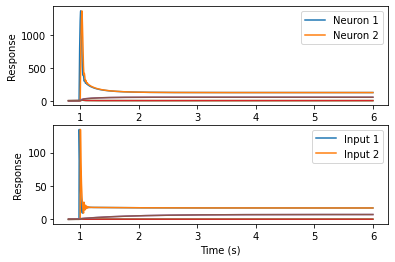

In [183]:
# number of seconds to simulate for
simulationLength = 20;

# Number of time points per second
sampleRate = 1000;

# some constants calculated from the above parameters
dt = 1/sampleRate;
nTimePoints = int(simulationLength * sampleRate);

x0 = np.matrix([0, 0, 0, 0, 0, 0]).transpose()
tau = 0.020;
tauI = 0.011;
tauH = 0.9;
h = 0.47;
g = 45;
gHigh = 0.75;
WMono = np.matrix([[-1/tau,0,0,0,0,0],[0,-1/tau,0,0,0,0],[1,0,-1/tauI,0,0,0],[0,1,0,-1/tauI,0,0],[h,0,0,0,-1/tauH,0],[0,h,0,0,0,-1/tauH]])
WBino = np.matrix([[-1/tau,0,0,0,0,0],[0,-1/tau,0,0,0,0],[1,0,-1/tauI,0,0,0],[0,1,0,-1/tauI,0,0],[h,0,0,0,-1/tauH,0],[0,h,0,0,0,-1/tauH]])

# define inputs
u = np.matrix(np.zeros((6,nTimePoints)));
pulseLen = 15;
u[0,int(1*sampleRate):int((1+pulseLen)*sampleRate)] = 10;
u[1,int(1*sampleRate):int((1+pulseLen)*sampleRate)] = 10;
u[0,int(0.98*sampleRate):int((1)*sampleRate)] = 10;
t = np.array(range(0,nTimePoints))/sampleRate;

# initialize array that will hold each state of the model
nTimePoints = int(simulationLength*sampleRate)
xMono = np.matrix(np.zeros((6,nTimePoints)))
xBino = np.matrix(np.zeros((6,nTimePoints)))
xMono[:,0] = x0;
xBino[:,0] = x0;

for iTimePoint in progressBar(range(1,nTimePoints)):
  # update linear part of monocular layer
  dx = WMono @ xMono[:,iTimePoint-1] * dt
  xMono[:,iTimePoint] = xMono[:,iTimePoint-1] + dx;
  # update non-linear part, first get input
  # as difference between and inhibition
  leftInput = u[0,iTimePoint] - g*xMono[2,iTimePoint-1]
  rightInput = u[1,iTimePoint] - g*xMono[3,iTimePoint-1]
  # threshold and square
  leftInput = np.multiply((leftInput>0),leftInput)**2
  rightInput = np.multiply((rightInput>0),rightInput)**2
  # now calculate naka-rushton
  leftNakaRushton = 100*leftInput / ((10 + xMono[4,iTimePoint-1])**2 + leftInput);
  rightNakaRushton = 100*rightInput / ((10 + xMono[5,iTimePoint-1])**2 + rightInput);
  # and add to Ev / Eh
  xMono[0,iTimePoint] += leftNakaRushton;
  xMono[1,iTimePoint] += rightNakaRushton;
  
  # update linear part of binocular layer
  dx = WBino @ xBino[:,iTimePoint-1] * dt
  xBino[:,iTimePoint] = xBino[:,iTimePoint-1] + dx;
  # update non-linear part, first get input
  # as difference between and inhibition
  leftInput = xMono[0,iTimePoint-1] - gHigh*xBino[2,iTimePoint-1]
  rightInput = xMono[1,iTimePoint-1] - gHigh*xBino[3,iTimePoint-1]
  # threshold and square
  leftInput = np.multiply((leftInput>0),leftInput)**2
  rightInput = np.multiply((rightInput>0),rightInput)**2
  # now calculate naka-rushton
  leftNakaRushton = 100*leftInput / ((10 + xBino[4,iTimePoint-1])**2 + leftInput);
  rightNakaRushton = 100*rightInput / ((10 + xBino[5,iTimePoint-1])**2 + rightInput);
  # and add to Ev / Eh
  xBino[0,iTimePoint] += leftNakaRushton;
  xBino[1,iTimePoint] += rightNakaRushton;

# dress up figure
plt.figure();
startTime = 0.8; endTime = 6
plt.subplot(2,1,1)
plt.plot(t[int(startTime*sampleRate):int(endTime*sampleRate)],xBino[:,int(startTime*sampleRate):int(endTime*sampleRate)].transpose());
#plt.plot(t[int(startTime*sampleRate):int(endTime*sampleRate)],u[:,int(startTime*sampleRate):int(endTime*sampleRate)].transpose());
plt.xlabel('Time (s)');
plt.ylabel('Response');
plt.legend(('Neuron 1','Neuron 2'))
plt.subplot(2,1,2)
plt.plot(t[int(startTime*sampleRate):int(endTime*sampleRate)],xMono[:,int(startTime*sampleRate):int(endTime*sampleRate)].transpose());
plt.xlabel('Time (s)');
plt.ylabel('Response');
plt.legend(('Input 1','Input 2'))

w,v=eig(W);
print('eigenvalue:', w);



In [306]:
# number of seconds to simulate for
simulationLength = 3;

# Number of time points per second
sampleRate = 1000;

# some constants calculated from the above parameters
dt = 1/sampleRate;
nTimePoints = int(simulationLength * sampleRate);

#initial state - just start with all 0s
x0 = np.matrix([0, 0, 0, 0]).transpose()

# some time constants
# tau is the intrinsic time constant of each neuron
tau = 0.005;

# weight matrix 
W = (1/tau)*np.matrix([[ -1,  1,  0,  1],
                        [  1, -1,  0,  0],
                        [  0,  0, -1,  0],
                        [  0,  0,  0, -1]])

# input weight matrix, each row is for a neuron
# each column is for one of the inputs as described below
WInput = np.matrix([[  0,  0,  0,  0],
                    [  0,  0,  0,  0],
                    [  1,  0,  0,  -1],
                    [  0,  1,  -1,  0]])

# define inputs. 
# Where u0 is motion stimulus input (will just make this)
# Where u1 is the color stimulus input
# Where u2 is the motion task input (1 for motion task, 0 otherwise)
# Where u3 is the color task input (1 for color task, 0 otherwise)
u = np.matrix(np.zeros((4,nTimePoints)));
trialLen = 1;
numSamplesInTrial = int((1+trialLen)*sampleRate)-int(1*sampleRate);
u[0,int(1*sampleRate+trialLen/2):int((1+trialLen)*sampleRate)] = np.random.normal(loc=0.8,scale=0.2,size=(1,int(numSamplesInTrial/2)));
u[1,int(1*sampleRate):int((1+trialLen/2)*sampleRate)] = np.random.normal(loc=0.8,scale=0.2,size=(1,int(numSamplesInTrial/2)));

# for a motion trial
u[2,int(1*sampleRate):int((1+trialLen)*sampleRate)] = 1
u[3,int(1*sampleRate):int((1+trialLen)*sampleRate)] = 0

# for a color trial
#u[2,int(1*sampleRate):int((1+trialLen)*sampleRate)] = 0
#u[3,int(1*sampleRate):int((1+trialLen)*sampleRate)] = 1

# a time vector, just so that we can plot the traces with real units.
t = np.array(range(0,nTimePoints))/sampleRate;

# initialize array that will hold each state of the model neurons over time
nTimePoints = int(simulationLength*sampleRate)
x = np.matrix(np.zeros((4,nTimePoints)))

# compute model using Euler's method
for iTimePoint in progressBar(range(1,nTimePoints)):
  dx = W @ x[:,iTimePoint-1] * dt
  x[:,iTimePoint] = x[:,iTimePoint-1] + dx + WInput @ u[:,iTimePoint];
  # threshold the units
  x[:,iTimePoint] = np.multiply((x[:,iTimePoint]>0),x[:,iTimePoint])

# Display figure
plt.figure();
startTime = 0.9; endTime = 2.5;
plt.subplot(4,1,1)
plt.plot(t[int(startTime*sampleRate):int(endTime*sampleRate)],x[0:2,int(startTime*sampleRate):int(endTime*sampleRate)].transpose());
plt.xlabel('Time (s)');
plt.ylabel('Response');
plt.legend(('Neuron 1','Neuron 2'))
plt.subplot(4,1,2)
plt.plot(t[int(startTime*sampleRate):int(endTime*sampleRate)],x[2:4,int(startTime*sampleRate):int(endTime*sampleRate)].transpose());
plt.xlabel('Time (s)');
plt.ylabel('Response');
plt.legend(('Neuron 3','Neuron 4'))
plt.subplot(4,1,3)
plt.plot(t[int(startTime*sampleRate):int(endTime*sampleRate)],u[0:2,int(startTime*sampleRate):int(endTime*sampleRate)].transpose());
plt.xlabel('Time (s)');
plt.ylabel('Response');
plt.legend(('Motion Input','Color Input'))
plt.subplot(4,1,4)
plt.plot(t[int(startTime*sampleRate):int(endTime*sampleRate)],u[2:4,int(startTime*sampleRate):int(endTime*sampleRate)].transpose());
plt.xlabel('Time (s)');
plt.ylabel('Response');
plt.legend(('Motion Task','Color Task'))

# display eigenvalues
w,v=eig(W);
print('eigenvalue:', w);



ValueError: ignored